In [14]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sqlalchemy import create_engine
from config import protocol, username, password, host, port, database_name

# from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



# Connect to AWS Server

In [3]:
# connect to postgres database
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)



# Load Data

In [4]:
# first dataframe
first_food_access_df = pd.read_sql_query('select * from food_access_1', engine)
first_food_access_df.tail()

,CensusTract,StateFIPS,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
71777,56043000200,56,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
71778,56043000301,56,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,...,14.97,89.19,0.19,0.86,0.00,1.50,8.26,16.74,7.63,3.55
71779,56043000302,56,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,...,20.30,90.95,0.43,0.39,0.04,1.02,7.16,16.01,2.25,6.27
71780,56045951100,56,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57
71781,56045951300,56,Wyoming,Weston County,1,3894,1699,17.3,76838.0,1,...,16.69,95.17,0.15,0.26,0.05,1.13,3.24,3.21,2.00,6.47


In [33]:
# second dataframe
second_food_access_df = pd.read_sql_query('select * from food_access_2', engine)
second_food_access_df.tail()

,CensusTract,StateFIPS,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
7703,56041975200,56,Wyoming,Uinta County,0,6505,2340,6.4,91350.0,0,...,9.16,96.88,0.22,0.20,0.17,0.57,1.97,2.87,3.03,3.46
7704,56041975300,56,Wyoming,Uinta County,0,7761,2696,13.6,62445.0,0,...,7.33,90.86,0.27,0.37,0.30,0.82,7.37,10.27,3.97,9.46
7705,56041975400,56,Wyoming,Uinta County,0,6852,2632,17.3,57248.0,0,...,10.35,89.90,0.29,0.28,0.03,0.98,8.52,12.71,4.71,8.24
7706,56043000200,56,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
7707,56045951100,56,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57


In [46]:
# third dataframe
third_food_access_df = pd.read_sql_query('select * from food_access_3', engine)
third_food_access_df.tail()

,CensusTract,StateFIPS,State,County,Urban,Pop2010,OHU2010,PovertyRate,MedianFamilyIncome,LAhalfand10,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
67281,56043000200,56,Wyoming,Washakie County,0,3326,1317,9.7,67254.0,1,...,17.83,93.39,0.18,0.45,0.00,0.81,5.17,9.29,4.63,4.86
67282,56043000301,56,Wyoming,Washakie County,1,2665,1154,11.6,64152.0,1,...,14.97,89.19,0.19,0.86,0.00,1.50,8.26,16.74,7.63,3.55
67283,56043000302,56,Wyoming,Washakie County,1,2542,1021,16.3,69605.0,1,...,20.30,90.95,0.43,0.39,0.04,1.02,7.16,16.01,2.25,6.27
67284,56045951100,56,Wyoming,Weston County,0,3314,1322,17.5,74500.0,1,...,15.06,95.93,0.45,0.30,0.03,1.42,1.87,2.75,3.56,2.57
67285,56045951300,56,Wyoming,Weston County,1,3894,1699,17.3,76838.0,1,...,16.69,95.17,0.15,0.26,0.05,1.13,3.24,3.21,2.00,6.47


# Random Forest Classifier with First Option (71,782 rows rows)

In [7]:
# Drop columns that don't contribute to the model
first_food_access_df= first_food_access_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
first_food_access_df.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,TractLOWI_PCT,TractKids_PCT,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,11.3,81250.0,1,23.80,26.52,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,17.9,49000.0,1,36.96,27.93,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,15.0,62609.0,1,38.72,26.50,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,2.8,70607.0,1,21.02,23.14,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,15.2,96334.0,1,20.82,29.37,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [8]:
# Define features and target
X = first_food_access_df.drop('LAhalfand10', axis=1)
y = first_food_access_df['LAhalfand10']

In [9]:
#scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Create and fit the model
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

# Predict the model
y_pred = clf.predict(X_test_scaled)

# Display scores
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.70      0.49      0.57      5645
           1       0.79      0.90      0.84     12301

    accuracy                           0.77     17946
   macro avg       0.75      0.70      0.71     17946
weighted avg       0.76      0.77      0.76     17946

Training Score: 1.0
Testing Score: 0.7727070099186448


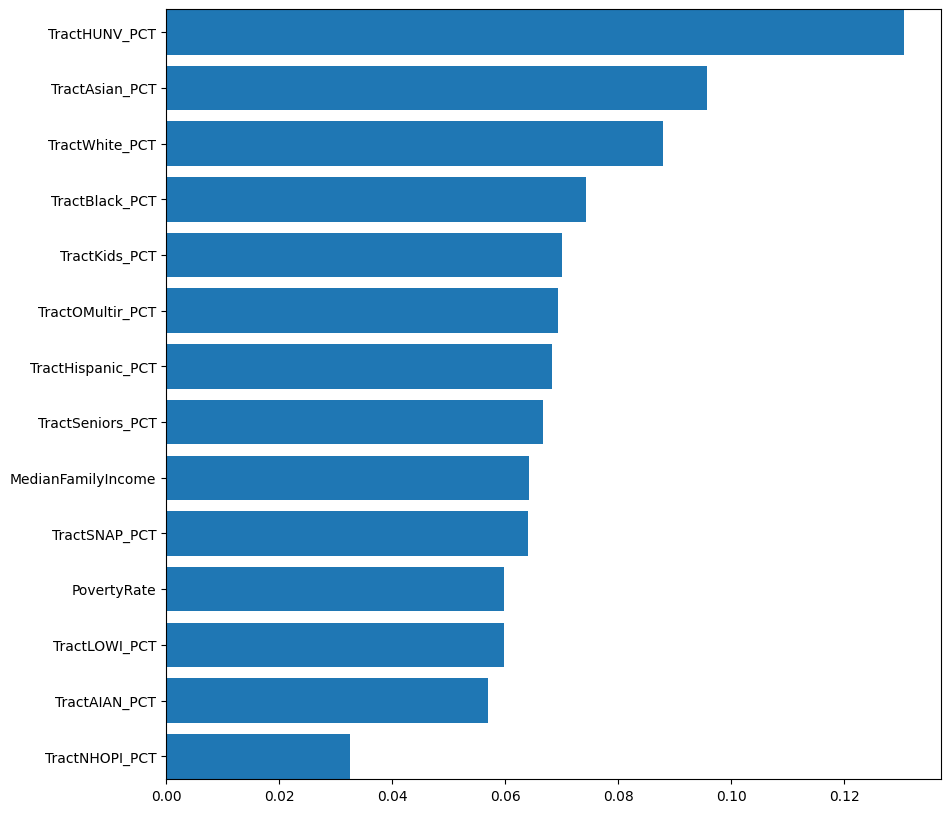

In [11]:
# visualize the feature importance
feature_importances = clf.feature_importances_

# print(features)
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [12]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\parkm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.61      0.46      0.52      5681
           1       0.77      0.86      0.82     12265

    accuracy                           0.74     17946
   macro avg       0.69      0.66      0.67     17946
weighted avg       0.72      0.74      0.72     17946

Training Score: 0.9999814250687272
Testing Score: 0.7353727850217319


## Hyperparameter tuning

In [15]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200,300]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [16]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      5681
           1       0.78      0.90      0.83     12265

    accuracy                           0.76     17946
   macro avg       0.73      0.67      0.68     17946
weighted avg       0.74      0.76      0.74     17946

Training Score: 0.785385244074597
Testing Score: 0.7559344700768974


# Random Forest Classifier with Second Option (7,708 rows)

In [35]:
# Drop columns that don't contribute to the model
second_food_access_df= second_food_access_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
second_food_access_df.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,8.9,89423.0,0,100.00,18.70,26.45,11.07,87.31,9.02,0.52,...,11.07,87.31,9.02,0.52,0.00,0.88,2.27,1.85,6.33,13.31
1,13.7,84833.0,0,99.00,26.67,27.63,10.06,82.85,13.25,0.58,...,10.16,83.79,13.29,0.58,0.07,0.47,1.79,1.52,5.36,9.53
2,9.8,77865.0,0,97.79,23.42,26.04,10.86,83.16,11.95,0.34,...,11.10,85.20,11.96,0.35,0.05,0.25,2.19,1.69,4.69,16.45
3,22.7,60900.0,1,100.00,38.67,25.92,11.99,76.81,20.84,0.10,...,11.99,76.81,20.84,0.10,0.00,0.62,1.62,1.35,0.83,13.46
4,24.1,49833.0,1,100.00,51.75,22.59,14.85,43.40,54.52,0.06,...,14.85,43.40,54.52,0.06,0.00,0.42,1.60,1.17,20.60,17.61


In [37]:
# Define features and target
X = second_food_access_df.drop('LAhalfand10', axis=1)
y = second_food_access_df['LAhalfand10']

In [38]:
#scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Create and fit the model
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

# Predict the model
y_pred = clf.predict(X_test_scaled)

# Display scores
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1005
           1       0.92      0.84      0.88       922

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 1.0
Testing Score: 0.8889465490399585


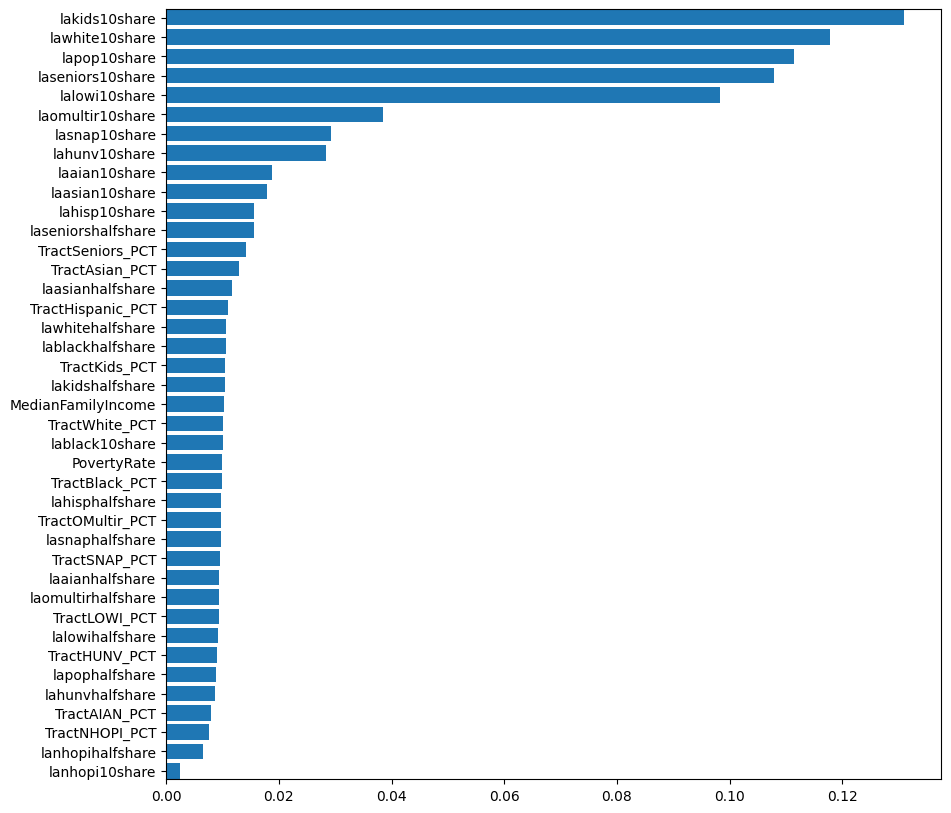

In [40]:
# visualize the feature importance
feature_importances = clf.feature_importances_

# print(features)
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [41]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\parkm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1000
           1       0.91      0.85      0.88       927

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 0.984604739664418
Testing Score: 0.8899844317592112


## Hyperparameter tuning

In [55]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200,300]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [43]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1000
           1       0.91      0.86      0.88       927

    accuracy                           0.89      1927
   macro avg       0.89      0.89      0.89      1927
weighted avg       0.89      0.89      0.89      1927

Training Score: 0.9330565646081993
Testing Score: 0.8915412558380903


# Random Forest Classifier with Third Option (67,286 rows)

In [47]:
# Drop columns that don't contribute to the model
third_food_access_df= third_food_access_df.drop(columns = ['Pop2010', 'OHU2010', 'StateFIPS', 'CensusTract', 'State', 'County', 'Urban',
              'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 
              'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'])
third_food_access_df.head()

,PovertyRate,MedianFamilyIncome,LAhalfand10,lapophalfshare,lalowihalfshare,lakidshalfshare,laseniorshalfshare,lawhitehalfshare,lablackhalfshare,laasianhalfshare,...,TractSeniors_PCT,TractWhite_PCT,TractBlack_PCT,TractAsian_PCT,TractNHOPI_PCT,TractAIAN_PCT,TractOMultir_PCT,TractHispanic_PCT,TractHUNV_PCT,TractSNAP_PCT
0,11.3,81250.0,1,100.00,24.42,26.52,11.56,84.83,11.35,0.73,...,11.56,84.83,11.35,0.73,0.00,0.73,2.35,2.30,0.87,14.72
1,17.9,49000.0,1,100.00,44.34,27.93,9.86,40.92,56.08,0.23,...,9.86,40.92,56.08,0.23,0.00,0.23,2.53,3.46,11.98,21.00
2,15.0,62609.0,1,84.70,28.79,22.86,10.60,64.53,16.43,0.30,...,13.02,76.37,19.18,0.50,0.15,0.33,3.47,2.58,7.88,13.69
3,2.8,70607.0,1,83.24,20.36,19.30,17.48,77.41,3.88,0.34,...,20.61,93.16,4.40,0.41,0.09,0.25,1.69,1.94,1.22,5.69
4,15.2,96334.0,1,72.25,15.97,21.45,7.80,58.51,9.29,1.94,...,10.46,80.49,13.35,2.75,0.08,0.45,2.88,3.30,5.63,8.30


In [48]:
# Define features and target
X = third_food_access_df.drop('LAhalfand10', axis=1)
y = third_food_access_df['LAhalfand10']

In [49]:
#scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Create and fit the model
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

# Predict the model
y_pred = clf.predict(X_test_scaled)

# Display scores
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      4620
           1       0.87      0.92      0.89     12202

    accuracy                           0.84     16822
   macro avg       0.81      0.78      0.79     16822
weighted avg       0.84      0.84      0.84     16822

Training Score: 1.0
Testing Score: 0.841814290809654


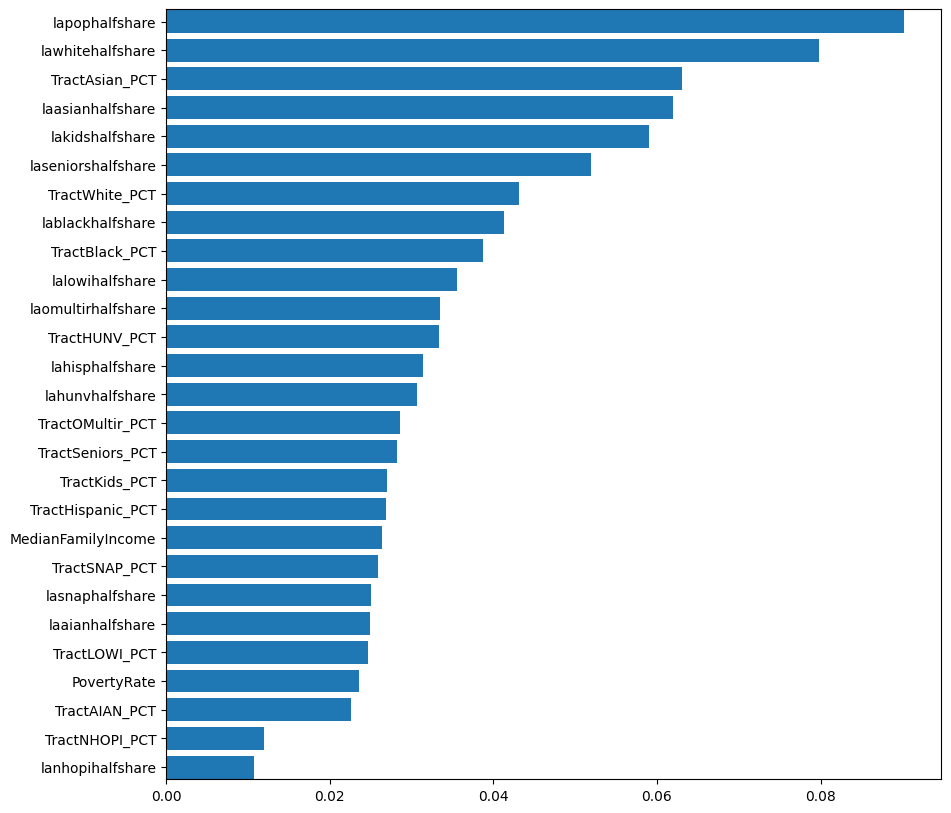

In [51]:
# visualize the feature importance
feature_importances = clf.feature_importances_
# print(features)

features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)

plt.show()

In [52]:
# Select important feature for model
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

# Split train/ test data
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# Scale the selected features
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Create and fit model with selected features
clf = RandomForestClassifier(random_state=1, n_estimators=100).fit(X_selected_train_scaled, y_train)

# Predict model
y_pred = clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

C:\Users\parkm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.60      0.65      4615
           1       0.86      0.91      0.88     12207

    accuracy                           0.83     16822
   macro avg       0.79      0.76      0.77     16822
weighted avg       0.82      0.83      0.82     16822

Training Score: 1.0
Testing Score: 0.8250505290690762


## Hyperparameter tuning

In [53]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [50, 100, 200,300]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model
grid_clf = GridSearchCV(estimator = clf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_clf.fit(X_selected_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=2)

In [54]:
# List the best parameters for this dataset
print(grid_clf.best_params_)

# Predict model
y_pred = grid_clf.predict(X_selected_test_scaled)

# Display score
print(classification_report(y_test, y_pred))

print(f'Training Score: {grid_clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {grid_clf.score(X_selected_test_scaled, y_test)}')


{'max_depth': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      4615
           1       0.85      0.92      0.88     12207

    accuracy                           0.83     16822
   macro avg       0.79      0.75      0.77     16822
weighted avg       0.82      0.83      0.82     16822

Training Score: 0.8566899175649968
Testing Score: 0.8262394483414576
